# Importing Libraries

In [1]:
# Importing necessary library and packages
# General Use
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3D Visualization
import plotly as py
import plotly.graph_objs as go

# Principal Component Analysis
from sklearn.decomposition import PCA

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Set random seed
np.random.seed(0)

# Data Preparation

In [2]:
#Importing the data of block information
data1 = pd.read_excel("blockhash.xlsx")
data1.head()

,blockID,bhash,btime,txs
0,327872,00000000000000001BECC903BF44978DEDE7C0429B08AF...,1414771239,288
1,327873,0000000000000000008F1C9DC87C18D50D6AAC82934DF4...,1414771715,256
2,327874,00000000000000001A80CF302D79ED1322AFB14F9E9455...,1414771566,176
3,327875,0000000000000000061E549AB51D10C89599C8BE690E6E...,1414771623,121
4,327876,00000000000000001068FE142FA57C1505BAE0DD2FC148...,1414772032,490


In [3]:
#Importing the data of transaction
data2 = pd.read_excel("tx.xlsx")
data2.head()

,txID,blockID,n_inputs,n_outputs,btime
0,50230631,327872,18,2,1414771239
1,50230632,327872,1,2,1414771239
2,50230633,327872,27,1,1414771239
3,50230634,327872,1,2,1414771239
4,50230635,327872,331,1,1414771239


In [4]:
#Importing the data of transaction inputs
data3 = pd.read_excel("txin.xlsx")
data3.head()

,txID,send_addrID,value
0,51575940,422,590000
1,51575940,422,3970000
2,51576100,422,13640000
3,51576102,422,12520000
4,51576103,422,11400000


In [5]:
#Importing the data of transaction outputs
data4 = pd.read_excel("txout.xlsx")
data4

,txID,receive_addrID,value
0,50511380,112,5480
1,50511375,139,5480
2,50283564,161,5480
3,50511381,165,5480
4,50511376,216,5480
...,...,...,...
1048570,50792182,28390850,66981530000
1048571,50792183,28390850,66881520000
1048572,50792229,28390850,66705500000
1048573,50792237,28390850,65266030000


In [6]:
#Merging the dataset data2 and data3
df1 = pd.merge(data2, data3, on="txID")
df1.head()

,txID,blockID,n_inputs,n_outputs,btime,send_addrID,value
0,50230631,327872,18,2,1414771239,29732365,3045854315
1,50230631,327872,18,2,1414771239,29732365,432914390
2,50230631,327872,18,2,1414771239,29732365,1282420595
3,50230631,327872,18,2,1414771239,29732365,1009556738
4,50230633,327872,27,1,1414771239,8441078,1000000


In [7]:
#Merging the dataset df1 and data4
df2 = pd.merge(df1, data4, on="txID")
df2.head()

,txID,blockID,n_inputs,n_outputs,btime,send_addrID,value_x,receive_addrID,value_y
0,50230639,327872,3,2,1414771239,6078391,1262832,15157877,1001311
1,50230641,327872,9,19,1414771239,12389926,30000000,27466155,1000240
2,50230641,327872,9,19,1414771239,19092393,1000913,27466155,1000240
3,50230641,327872,9,19,1414771239,26300432,149900000,27466155,1000240
4,50230676,327872,1,2,1414771239,3886651,150000,3886651,96340


In [8]:
#Creating pivot table to get the information of blocks
pivot = pd.pivot_table(df2, values=['n_inputs', 'n_outputs', 'value_x', 'value_y'], index=['blockID'], 
                       aggfunc=np.sum, fill_value=0)
pivot.reset_index()
pivot.head()

,n_inputs,n_outputs,value_x,value_y
blockID,,,,
327872,57010,1453,17922561000,5326933667
327873,16886,430,9626161187,199267946940
327874,4498,4621,6257128442,7418868564
327875,7585,829,12482161809,73029654331
327876,12104,7304,245349326819,424617793178


In [9]:
#Merging the dataset pivot and data and preparing the final dataset
final = pd.merge(pivot, data1, on="blockID")
final = final.rename(columns={'value_x': 'send_value', 'value_y': 'receive_value'})
final.drop(columns=['bhash'], inplace=True)
final['blockID'] = final['blockID'].astype(str)
final.head()

,blockID,n_inputs,n_outputs,send_value,receive_value,btime,txs
0,327872,57010,1453,17922561000,5326933667,1414771239,288
1,327873,16886,430,9626161187,199267946940,1414771715,256
2,327874,4498,4621,6257128442,7418868564,1414771566,176
3,327875,7585,829,12482161809,73029654331,1414771623,121
4,327876,12104,7304,245349326819,424617793178,1414772032,490


In [10]:
#the datatypes of final dataset
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   blockID        1867 non-null   object
 1   n_inputs       1867 non-null   int64 
 2   n_outputs      1867 non-null   int64 
 3   send_value     1867 non-null   int64 
 4   receive_value  1867 non-null   int64 
 5   btime          1867 non-null   int64 
 6   txs            1867 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 116.7+ KB


# Exloratory Data Analysis

## Understanding the data

In [11]:
#the head of final dataset
final.head()

,blockID,n_inputs,n_outputs,send_value,receive_value,btime,txs
0,327872,57010,1453,17922561000,5326933667,1414771239,288
1,327873,16886,430,9626161187,199267946940,1414771715,256
2,327874,4498,4621,6257128442,7418868564,1414771566,176
3,327875,7585,829,12482161809,73029654331,1414771623,121
4,327876,12104,7304,245349326819,424617793178,1414772032,490


In [12]:
#the tail of final dataset
final.tail()

,blockID,n_inputs,n_outputs,send_value,receive_value,btime,txs
1862,329755,3931,2051,546700299565,373872834538,1415843361,1825
1863,329756,10889,1735,234574792660,800360544838,1415843697,953
1864,329757,16244,9362,701069270305,237624261698,1415844611,1140
1865,329758,2570,1331,1008820731888,275948278237,1415845241,668
1866,329759,18212,17749,79526022865,70207472808,1415845421,467


In [13]:
#the shape of final dataset
final.shape

(1867, 7)

In [14]:
#the summary statistics of final dataset
final.describe()

,n_inputs,n_outputs,send_value,receive_value,btime,txs
count,1867.000000,1.867000e+03,1.867000e+03,1.867000e+03,1.867000e+03,1867.000000
mean,17686.285485,6.647364e+04,2.031747e+11,2.793845e+11,1.415290e+09,561.716122
std,54478.486930,5.491784e+05,9.526174e+11,1.074913e+12,3.105337e+05,472.753075
min,1.000000,2.000000e+00,3.497600e+04,1.334290e+05,1.414771e+09,3.000000
25%,1390.500000,7.660000e+02,1.991471e+10,1.749665e+10,1.415026e+09,200.000000
50%,5741.000000,3.877000e+03,6.359561e+10,6.595177e+10,1.415285e+09,430.000000
75%,14536.000000,1.095350e+04,1.599463e+11,1.929444e+11,1.415559e+09,789.000000
max,858062.000000,1.266092e+07,2.241727e+13,1.992761e+13,1.415845e+09,2421.000000


In [15]:
#the columns of final dataset
final.columns

Index(['blockID', 'n_inputs', 'n_outputs', 'send_value', 'receive_value',
       'btime', 'txs'],
      dtype='object')

In [16]:
#the number of unique values of different variable
final.nunique()

blockID          1867
n_inputs         1735
n_outputs        1669
send_value       1867
receive_value    1867
btime            1865
txs               962
dtype: int64

## Cleaning the data

In [17]:
#total null values of different variables
final.isnull().sum()

blockID          0
n_inputs         0
n_outputs        0
send_value       0
receive_value    0
btime            0
txs              0
dtype: int64

In [18]:
#dropping the dependent variable blockID
final = final.drop(['blockID'], axis=1)
final.head()

,n_inputs,n_outputs,send_value,receive_value,btime,txs
0,57010,1453,17922561000,5326933667,1414771239,288
1,16886,430,9626161187,199267946940,1414771715,256
2,4498,4621,6257128442,7418868564,1414771566,176
3,7585,829,12482161809,73029654331,1414771623,121
4,12104,7304,245349326819,424617793178,1414772032,490


## Relationship analysis

In [19]:
#setting the correlation coefficient
correlation = final.corr()

<AxesSubplot:>

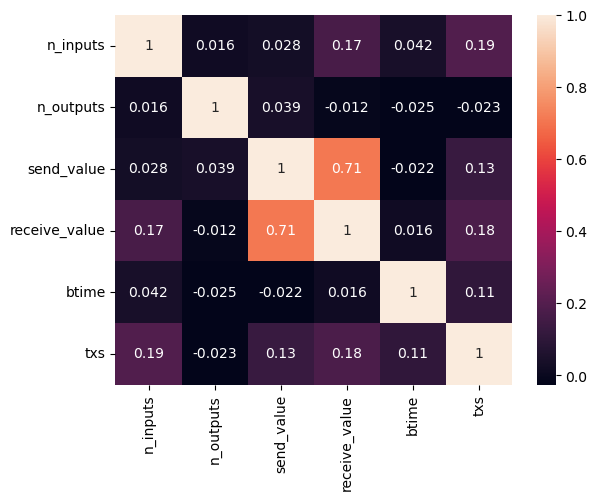

In [20]:
#Using heatmap to illustrate the correlations between variables
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

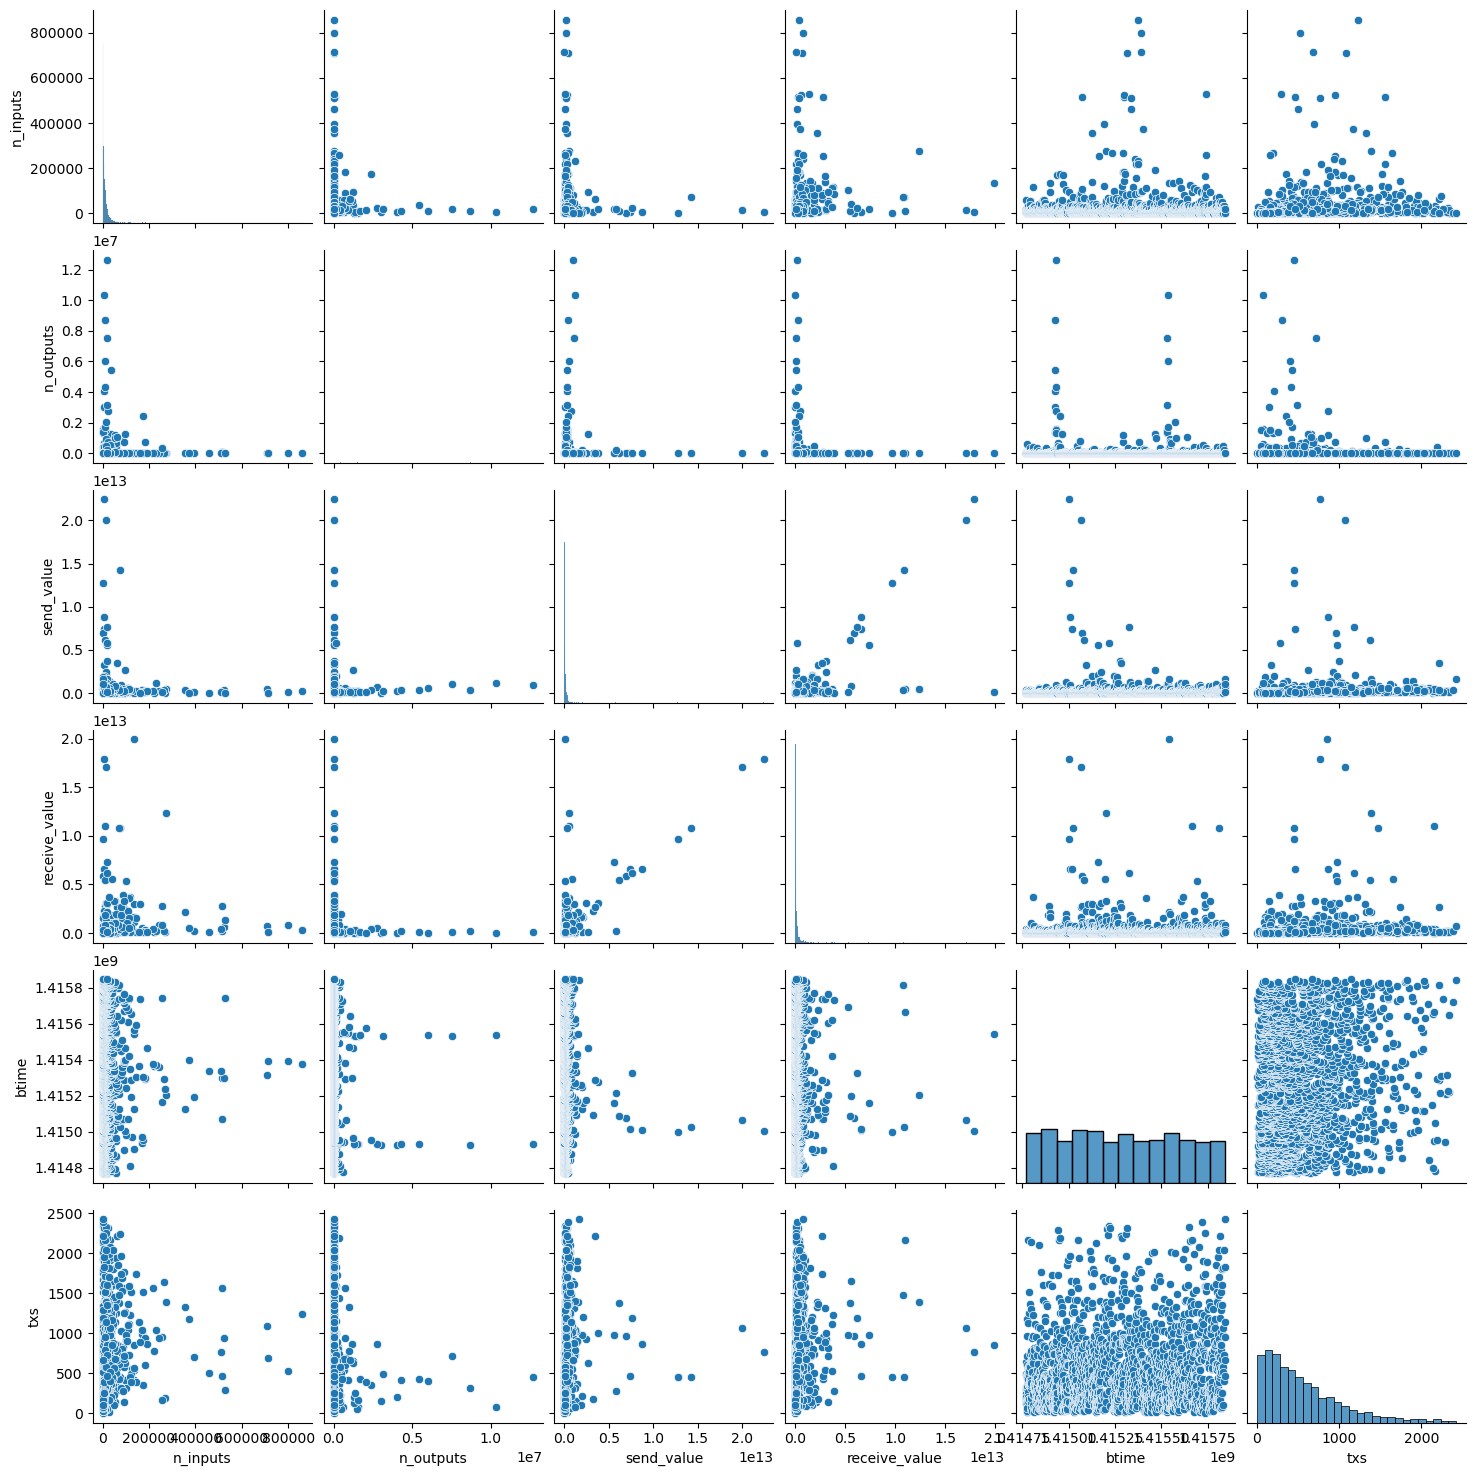

In [21]:
#Using pairplot to illustrate the correlations between variables
sns.pairplot(final)

D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_inputs', ylabel='Density'>

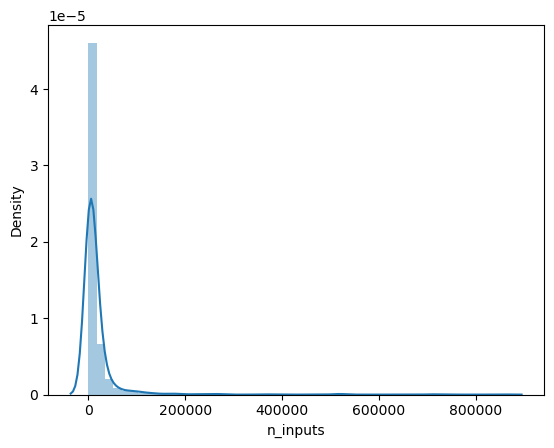

In [22]:
#Using distribution plot to illustrate the distribution of n_inputs
sns.distplot(final["n_inputs"])

D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_outputs', ylabel='Density'>

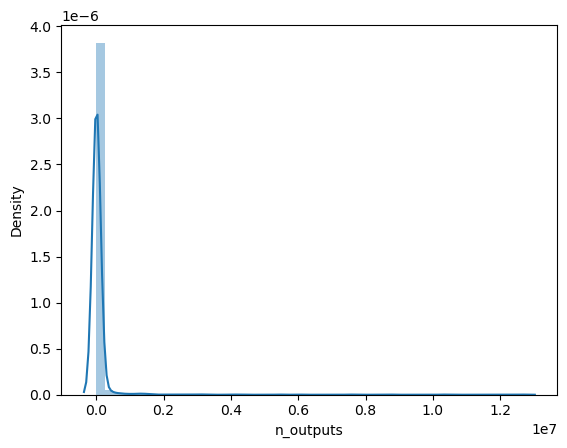

In [23]:
#Using distribution plot to illustrate the distribution of n_outputs
sns.distplot(final["n_outputs"])

D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='send_value', ylabel='Density'>

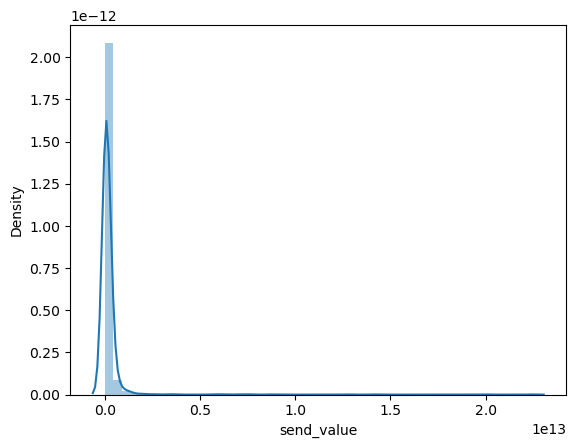

In [24]:
#Using distribution plot to illustrate the distribution of send_value
sns.distplot(final["send_value"])

D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='receive_value', ylabel='Density'>

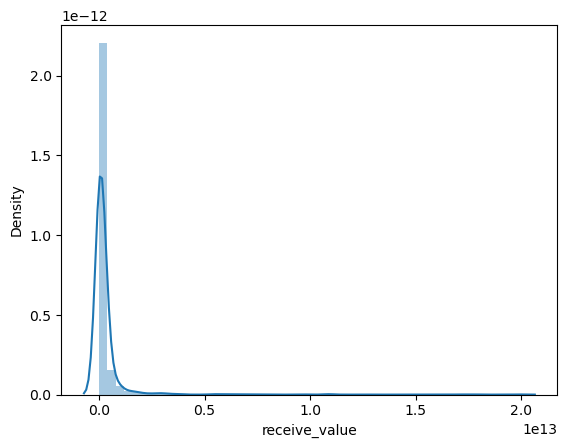

In [25]:
#Using distribution plot to illustrate the distribution of recieve_value
sns.distplot(final["receive_value"])

D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='btime', ylabel='Density'>

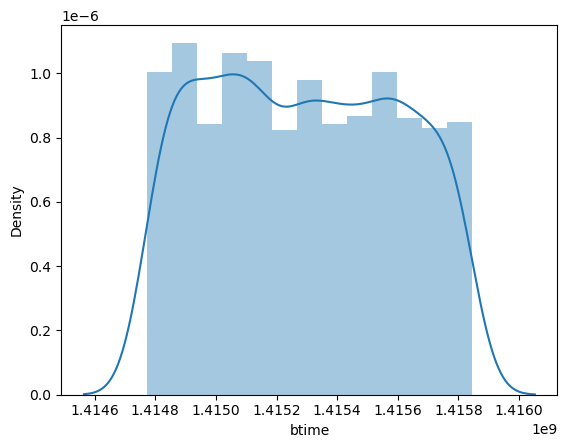

In [26]:
#Using distribution plot to illustrate the distribution of block creation time
sns.distplot(final["btime"])

D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='txs', ylabel='Density'>

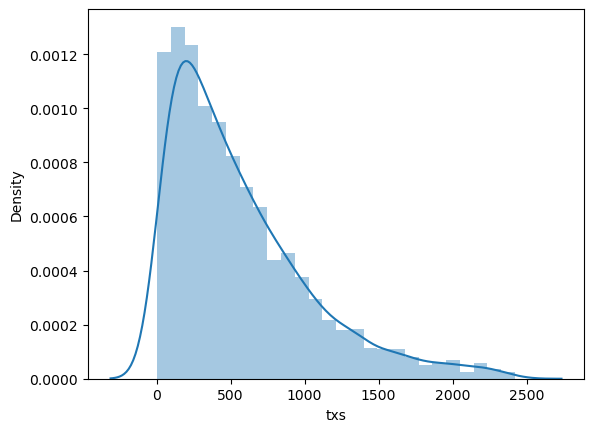

In [27]:
#Using distribution plot to illustrate the distribution of transactions
sns.distplot(final["txs"])

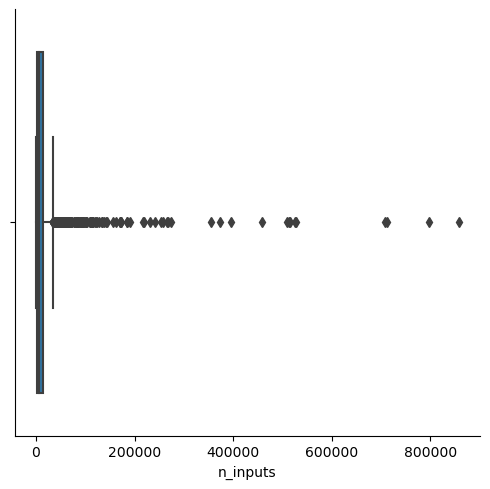

In [28]:
#Using box plot to illustrate the distribution of n_inputs
sns.catplot(x='n_inputs', kind='box',data=final)

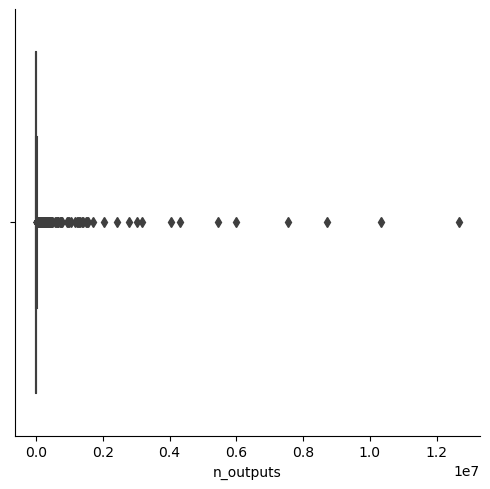

In [29]:
#Using boxplot plot to illustrate the distribution of n_outputs
sns.catplot(x='n_outputs', kind='box',data=final)

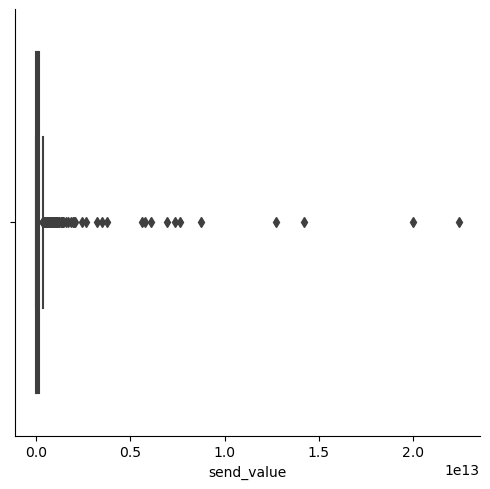

In [30]:
#Using box plot to illustrate the distribution of send_value
sns.catplot(x='send_value', kind='box',data=final)

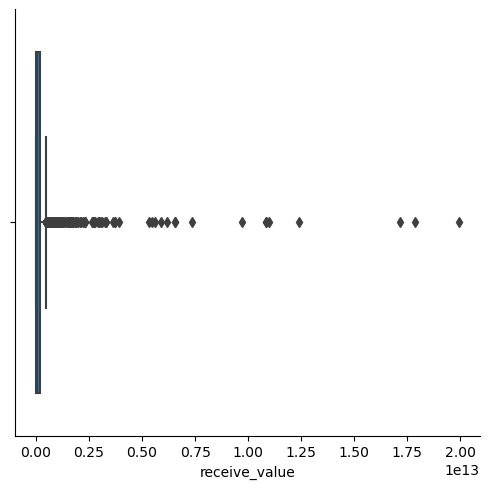

In [31]:
#Using box plot to illustrate the distribution of receive_value
sns.catplot(x='receive_value', kind='box', data=final)

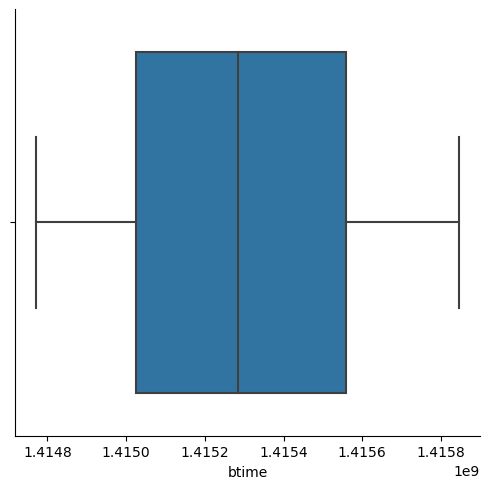

In [32]:
#Using box plot to illustrate the distribution of block creation time
sns.catplot(x='btime', kind='box', data=final)

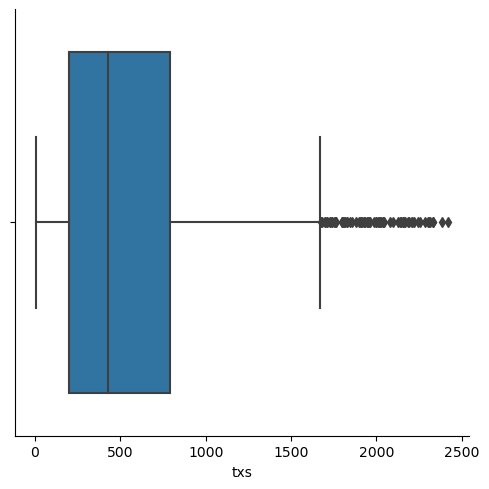

In [33]:
#Using box plot to illustrate the distribution of transactions
sns.catplot(x='txs', kind='box', data=final)

# K-means Clustering

In [34]:
#Preparaing the dataset for K-means algorithm
dataD = final[["n_inputs", "n_outputs", "send_value", "receive_value", "btime", "txs"]]
dataD

,n_inputs,n_outputs,send_value,receive_value,btime,txs
0,57010,1453,17922561000,5326933667,1414771239,288
1,16886,430,9626161187,199267946940,1414771715,256
2,4498,4621,6257128442,7418868564,1414771566,176
3,7585,829,12482161809,73029654331,1414771623,121
4,12104,7304,245349326819,424617793178,1414772032,490
...,...,...,...,...,...,...
1862,3931,2051,546700299565,373872834538,1415843361,1825
1863,10889,1735,234574792660,800360544838,1415843697,953
1864,16244,9362,701069270305,237624261698,1415844611,1140
1865,2570,1331,1008820731888,275948278237,1415845241,668


## Finding the Optimal Number of Clusters with the Elbow Method

In [35]:
#Setting the algorithm for the Elbow Method
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(dataD)
    sum_of_sqr_dist[k] = km.inertia_

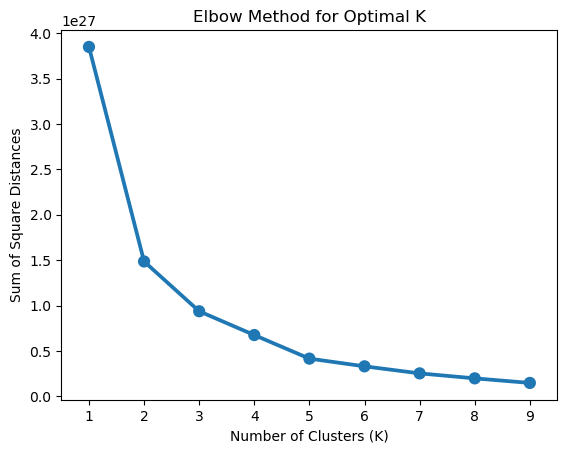

In [36]:
#Visualizing the Elbow Method for Optimal number of clustering
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [37]:
#Setting the KMeans algorithm for the number of clusters 2
Model2 = KMeans(n_clusters=2, init='k-means++', max_iter=1000)
Model2.fit(dataD)

KMeans(max_iter=1000, n_clusters=2)

In [38]:
#Fitting the model and visualizing the predicted clusters
dataD['Cluster'] = Model2.fit_predict(dataD)
dataD.head()

,n_inputs,n_outputs,send_value,receive_value,btime,txs,Cluster
0,57010,1453,17922561000,5326933667,1414771239,288,0
1,16886,430,9626161187,199267946940,1414771715,256,0
2,4498,4621,6257128442,7418868564,1414771566,176,0
3,7585,829,12482161809,73029654331,1414771623,121,0
4,12104,7304,245349326819,424617793178,1414772032,490,0


In [39]:
#Separating Normal blocks (Cluster==0) and Suspicious blocks (Cluster==1)
clx0 = dataD[dataD.Cluster==0]
clx1 = dataD[dataD.Cluster==1]

In [40]:
#the head of Suspicious blocks
clx1.head()

,n_inputs,n_outputs,send_value,receive_value,btime,txs,Cluster
430,1085,3724,12745124857961,9702836243912,1415000201,447,1
431,4412,3983,22417272760777,17870454224088,1415001351,768,1
441,6422,3892,8763109612611,6570002285316,1415009139,861,1
448,3962,3957,7382071560929,6550059450098,1415016715,461,1
467,73385,3308,14212064663127,10855485242217,1415026377,457,1


In [41]:
#Counting the number of blocks in two clusters 
kmeans_model = KMeans(n_clusters = 2, random_state = 1).fit(dataD)
dataD['kmean'] = kmeans_model.labels_
dataD['kmean'].value_counts()

0    1853
1      14
Name: kmean, dtype: int64

## Evaluation with Silhouette Score

In [42]:
#Setting the labels variable
labels = Model2.labels_

In [43]:
#the silhouette score for this dataset
silhouette_score(dataD, labels)

0.9659070225286269

In [44]:
#Setting the algorithm for the silhouette score of different number of clusters
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(dataD)
    silhouette[k] = silhouette_score(dataD, km.labels_)

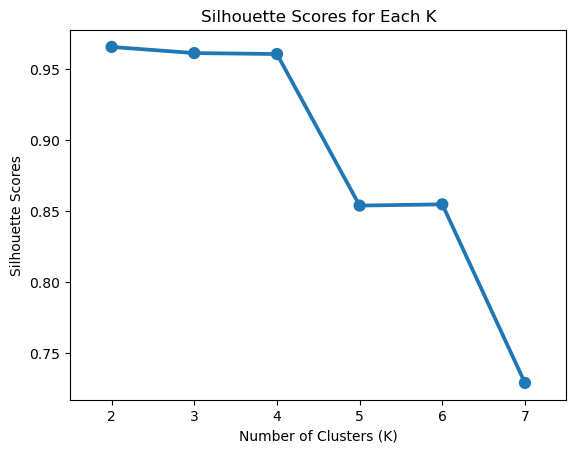

In [45]:
#Visualizing the silhouette score of different number of clusters
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

# Principal Component Analysis

In [46]:
#the head of dataset for Principal Component Analysis
dataD.head()

,n_inputs,n_outputs,send_value,receive_value,btime,txs,Cluster,kmean
0,57010,1453,17922561000,5326933667,1414771239,288,0,0
1,16886,430,9626161187,199267946940,1414771715,256,0,0
2,4498,4621,6257128442,7418868564,1414771566,176,0,0
3,7585,829,12482161809,73029654331,1414771623,121,0,0
4,12104,7304,245349326819,424617793178,1414772032,490,0,0


In [47]:
#Preparing the dataset for Principal Component Analysis
PCAD = pd.merge(final, dataD, on=["n_inputs", "n_outputs", "receive_value", "send_value", "btime", "txs"])
FPCAD = PCAD['Cluster']
PCAD.drop(columns=['Cluster', 'kmean'], inplace=True)
PCAD

,n_inputs,n_outputs,send_value,receive_value,btime,txs
0,57010,1453,17922561000,5326933667,1414771239,288
1,16886,430,9626161187,199267946940,1414771715,256
2,4498,4621,6257128442,7418868564,1414771566,176
3,7585,829,12482161809,73029654331,1414771623,121
4,12104,7304,245349326819,424617793178,1414772032,490
...,...,...,...,...,...,...
1862,3931,2051,546700299565,373872834538,1415843361,1825
1863,10889,1735,234574792660,800360544838,1415843697,953
1864,16244,9362,701069270305,237624261698,1415844611,1140
1865,2570,1331,1008820731888,275948278237,1415845241,668


In [48]:
#the columns of the dataset
PCAD.keys()

Index(['n_inputs', 'n_outputs', 'send_value', 'receive_value', 'btime', 'txs'], dtype='object')

In [49]:
#Scaling the data StandardScaler
scaler = StandardScaler()
scaler.fit(PCAD)
scaled_data = scaler.transform(PCAD)

In [50]:
#Setting the algorithm for Principal Component Analysis
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [51]:
#The dimensionality reduction with Principal Component Analysis
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(1867, 6)
(1867, 2)


Text(0, 0.5, 'Second principal component')

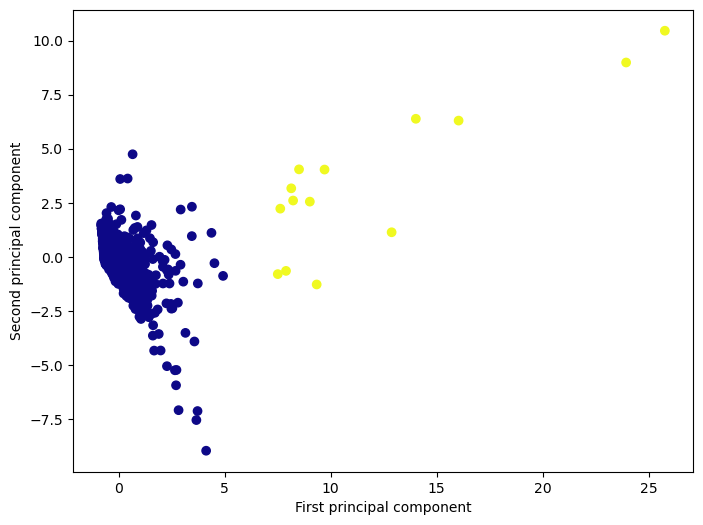

In [52]:
#Visualizing the Principal Components of Principal Component Analysis
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=FPCAD, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [53]:
#Interpreting the components
pca.components_

array([[ 0.23503162,  0.01544764,  0.63467123,  0.66704014,  0.04719674,
         0.30747984],
       [-0.52143899,  0.16452848,  0.31500736,  0.16750288, -0.52906585,
        -0.54206479]])

<AxesSubplot:>

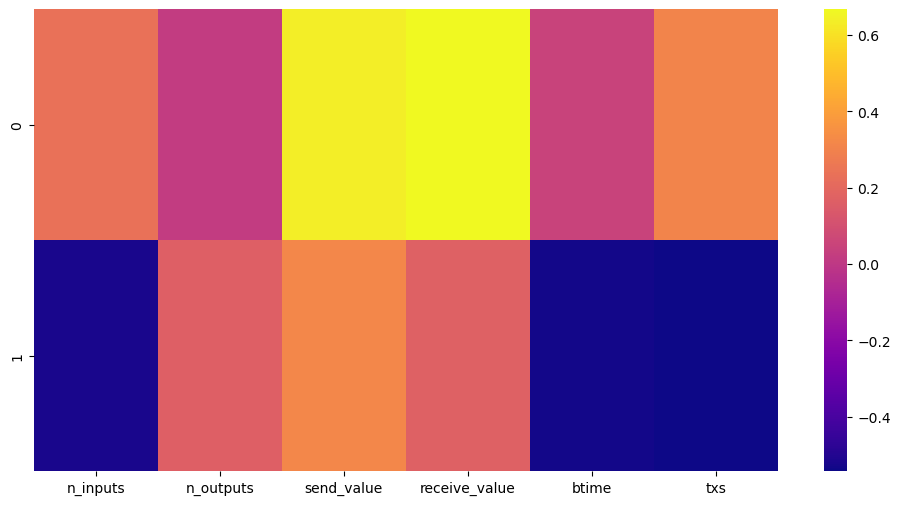

In [54]:
#Visualizing the contributions of the components
df_comp = pd.DataFrame(pca.components_, columns = PCAD.keys())
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

# Random Forest

In [55]:
#Preparing the dataset for Random Forest
dataD.drop(columns=['kmean'], inplace=True)
dataD

,n_inputs,n_outputs,send_value,receive_value,btime,txs,Cluster
0,57010,1453,17922561000,5326933667,1414771239,288,0
1,16886,430,9626161187,199267946940,1414771715,256,0
2,4498,4621,6257128442,7418868564,1414771566,176,0
3,7585,829,12482161809,73029654331,1414771623,121,0
4,12104,7304,245349326819,424617793178,1414772032,490,0
...,...,...,...,...,...,...,...
1862,3931,2051,546700299565,373872834538,1415843361,1825,0
1863,10889,1735,234574792660,800360544838,1415843697,953,0
1864,16244,9362,701069270305,237624261698,1415844611,1140,0
1865,2570,1331,1008820731888,275948278237,1415845241,668,0


In [56]:
#Creating Test and Train Data
dataD['is_train'] = np.random.uniform(0, 1, len(dataD)) <= .75

#the head of the dataset
dataD.head()

,n_inputs,n_outputs,send_value,receive_value,btime,txs,Cluster,is_train
0,57010,1453,17922561000,5326933667,1414771239,288,0,True
1,16886,430,9626161187,199267946940,1414771715,256,0,False
2,4498,4621,6257128442,7418868564,1414771566,176,0,True
3,7585,829,12482161809,73029654331,1414771623,121,0,True
4,12104,7304,245349326819,424617793178,1414772032,490,0,True


In [57]:
#Creating dataframes with test rows and training rows
train, test = dataD[dataD['is_train']==True], dataD[dataD['is_train']==False]

#Showing the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 1401
Number of observations in the test data: 466


In [58]:
#Creating a list of the feature column's names
features = dataD.columns[:6]

#Viewing features
print(features)

Index(['n_inputs', 'n_outputs', 'send_value', 'receive_value', 'btime', 'txs'], dtype='object')


In [59]:
#Viewing target
y = train['Cluster']
y.head()

0    0
2    0
3    0
4    0
5    0
Name: Cluster, dtype: int32

In [60]:
#Creating a random forest Classifier.
clf = RandomForestClassifier(n_jobs=2, random_state=0)

#Training the Classifier
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [61]:
#Applying the trained classifier to the test
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
#Viewing the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [63]:
#Creating actual english names for the plants for each predicted plant class
preds = clf.predict(test[features])
preds = pd.Series(np.where(preds == 1, 'Suspicious', 'Normal'))

#Viewing the PREDICTED species
preds.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
dtype: object

In [64]:
#Viewing the ACTUAL species for the first five observations
actual = test['Cluster']
actual = pd.Series(np.where(actual == 1, 'Suspicious', 'Normal'))
actual.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
dtype: object

## Evaluation with Confusion Matrix

In [65]:
#Settting up the confusion matrix
cm = confusion_matrix(actual, preds)
cm

array([[463,   0],
       [  0,   3]], dtype=int64)

In [66]:
#Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting
cm_df = pd.DataFrame(cm,
                     index = ['Normal','Suspicious'], 
                     columns = ['Normal','Suspicious'])

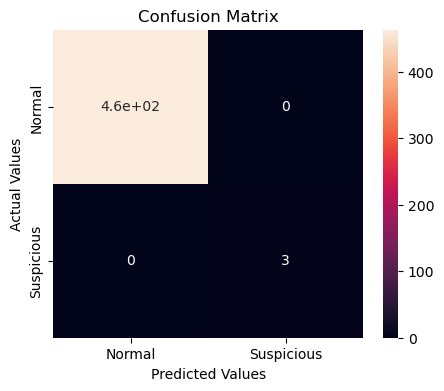

In [67]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()